### 프리미어리그 데이터를 이용한 회기분석 정리

#### 1. 회기분석의 간단한 예시
- 2016년도 프리미어리그 득점, 실점, 승점 데이터
- 독립변수는 원인, 종속변수는 결과
- 득점은 원인, 승점은 결과
- 득점이 많을수록 승점이 높다
- 실점이 적을수록 승점이 높다

2016년 프리미어 리그 득점, 실점, 승점 데이터 로드

In [1]:
df = pd.read_csv("../datas/premierleague.csv")
df.tail(2)

,name,gf,ga,points
18,Stoke City,35,68,33
19,West Bromwich Albion,31,56,31


득점과 승점에 대한 산포도 그래프

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

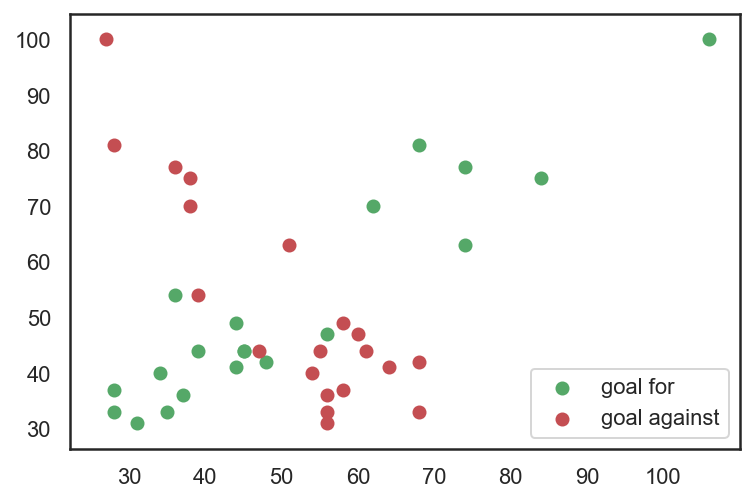

In [4]:
plt.scatter(df["gf"], df["points"], c="g", label="goal for")
plt.scatter(df["ga"], df["points"], c="r", label="goal against")
plt.legend()
plt.show()

#### 만약에 득점이 90점이면 승점은 몇점일까?
- 추세선을 찾아내면 독립변수 득점에 대한 종속변수 승점을 알아낼수 있습니다.
- 득점에 대한 승점의 추세선을 찾아내는것이 회귀분석의 목적
- 추세선을 구하는 방법이 회귀 분석입니다.

- 득점으로 회귀 분석 모델 학습하기

In [5]:
import statsmodels.api as sm

In [9]:
# 득점으로 승점 예측 모델 학습
feature = sm.add_constant(df["gf"], has_constant="add")
model = sm.OLS(df["points"], feature).fit()

In [10]:
model.params

const    8.685257
gf       0.851960
dtype: float64

In [12]:
# 예측값 구하기
pred_1 = np.dot(feature, model.params).astype("int")
pred_1

array([98, 66, 71, 80, 61, 71, 39, 46, 56, 41, 47, 47, 49, 46, 37, 32, 40,
       32, 38, 35])

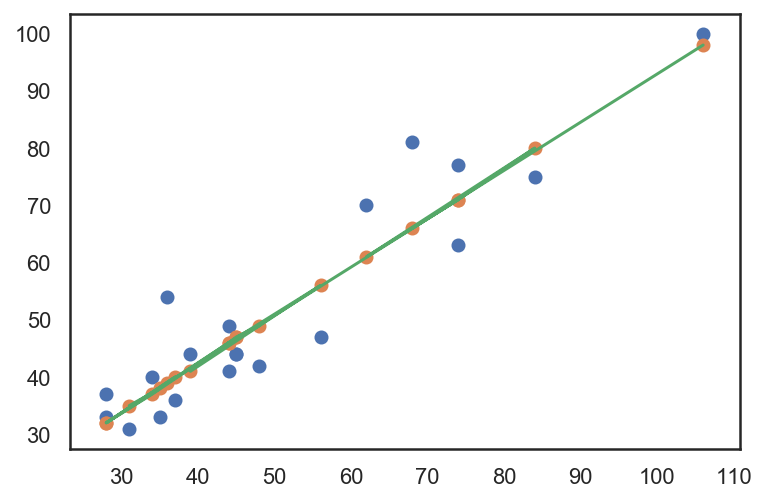

In [17]:
# 그래프 표현
plt.scatter(df["gf"], df["points"])
plt.scatter(df["gf"], pred_1)

plt.plot(df["gf"], pred_1, c="g")

plt.show()

- 실점으로 회귀 분석 모델 학습하기

In [18]:
# 실점 데이터로 모델 만들어서 회귀계수 출력하기

In [19]:
feature = sm.add_constant(df["ga"], has_constant="add")
model = sm.OLS(df["points"], feature).fit()

In [20]:
model.params

const    120.183763
ga        -1.338581
dtype: float64

In [21]:
pred_2 = np.dot(feature, model.params).astype("int")
pred_2

array([84, 82, 71, 69, 69, 51, 67, 42, 39, 57, 46, 38, 29, 34, 47, 42, 45,
       45, 29, 45])

#### 득점으로 예측하는것이 좋을까? 실점으로 예측하는것이 좋을까?
- 모델 평가
    - MSE : mean squared error
        - 실제 데이터에서 예측 데이터를 빼서 제곱한 데이터를 모두 더한후 평균 구하고 갯수를 나눠줌
    - MAE : mean absolute error
        - 실제 데이터에서 예측 데이터를 빼서 절대값을 취한 후 모두 더후 평균 구하고 갯수를 나눠줌

In [27]:
(df[["gf", "ga", "points"]].corr()**2)["points"].reset_index()

,index,points
0,gf,0.868327
1,ga,0.757934
2,points,1.000000


In [36]:
# MAE
mae_1 = np.mean(np.absolute(pred_1 - np.array(df["points"]))) / len(df)
mae_1

0.2875

In [38]:
mae_2 = np.round(np.mean(np.absolute(pred_2 - np.array(df["points"]))) / len(df), 4)
mae_2

0.405

#### sklearn을 이용한 모델 학습 및 평가

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
x = df[["gf", "ga"]]
y = df["points"]

In [42]:
train_x, test_x, train_y, test_y = train_test_split(
    x, y, test_size=0.2, random_state=1)
train_x.shape, train_y.shape

((16, 2), (16,))

In [44]:
# 모델 학습
model = LinearRegression().fit(train_x, train_y)

In [48]:
# 모델 평가
pred_y = model.predict(test_x).astype("int")
pred_y, np.array(test_y)

(array([81, 40, 50, 46]), array([75, 36, 54, 44]))

In [51]:
# mae, mse, rmse
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
rmse = mean_squared_error(test_y, pred_y) ** 0.5
mae, mse, rmse

(4.0, 18.0, 4.242640687119285)

In [52]:
# 예측 : 모델 사용

In [54]:
data = pd.DataFrame({ "gf": [84], "ga": [36] })
data

,gf,ga
0,84,36


In [56]:
model.predict(data).astype("int")

array([82])